# A real world workchain example: electronic band structure


*Import statements - make sure to execute the cell below this one (it may be hidden)*

In [1]:
%matplotlib inline
%aiida

from datetime import datetime, timedelta

from aiida.tools.dbimporters.plugins.cod import CodDbImporter
from aiida.engine import launch

PwBandStructureWorkChain = WorkflowFactory('quantumespresso.pw.band_structure')

### Calculating the electronic band structure with an AiiDA workchain
This tutorial will show how useful a workchain can be in performing a well defined task, such as computing and visualizing the electronic band structure for a simple crystal structure. The goal of this tutorial is not to show you the intricacies of the actual workchain itself, but rather to serve as an example that workchains can simplify standard workflows in computational materials science. The workchain that we will use here will employ Quantum Espresso's pw.x code to calculate the charge densities for several crystal structures and compute a band structure from those. Many choices that normally face the researcher before being able to perform this calculation, such as the selection of suitable pseudo potentials, energy cutoff values, k-point grids and k-point paths along high symmetry points, are now performed automatically by the workchain. All that remains for the user to do is to simply define a structure, pass it to the workchain and sit back!

Below, we import the crystal structure of Al as an example, and run the PwBandStructureWorkChain for that structure. The estimated run time is noted in a comment in the calculation cell.

In [3]:
# Loading the COD importer so we can directly import structure from COD id's
importer = CodDbImporter()
# Make sure here to define the correct codename that corresponds to the pw.x code installed on your machine of choice
codename = 'qe-6.3-pw@localhost'
code = Code.get_from_string(codename)

#### Importing example crystal structures from COD to AiiDA structure objects

In [4]:
# Al COD ID='9008460'
structure_Al = importer.query(id='9008460')[0].get_aiida_structure()

structure_Al.get_formula()

# The following structure can be used instead of Al, but will take much longer on the AWS machine.
# CaF2 COD ID='1000043' -- approximately 1/2 hour to run
# h-BN COD ID='9008997' -- approximately 45 mins to run
# GaAs COD ID='9008845' -- approximately 2 hours to run 

/home/dtomerini/aiida-1.0.0b1/local/lib/python2.7/site-packages/pymatgen/__init__.py:89: UserWarning: 
Pymatgen will drop Py2k support from v2019.1.1. Pls consult the documentation
at https://www.pymatgen.org for more details.
  at https://www.pymatgen.org for more details.""")


'Al4'

#### Now we run the bandstructure workchain for the selected structures

The bandstructure workchain follows the following protocol:
* Determine the primitive cell of the input structure
* Run a vc-relax to relax the structure
* Refine the symmetry of the relaxed structure to ensure the primitive cell is used and run a self-consistent field calculation on it
* Run a non self-consistent field band structure calculation along a path of high symmetry k-points determined by [seekpath](http://materialscloud.org/tools/seekpath)

Numerical parameters for the default 'theos-ht-1.0' protocol are determined as follows:
* Suitable pseudopotentials and energy cutoffs are automatically searched from the [SSSP library](http://materialscloud.org/sssp) installed on your machine  (it uses the efficiency version 1.1)
* K-point mesh is selected to have a minimum k-point density of 0.2 Å<sup>-1</sup>
* A Marzari-Vanderbilt smearing of 0.02 Ry is used for the electronic occupations

In [5]:
# This will take approximately 6 minutes on the tutorial AWS (for Al)
results = launch.run(
    PwBandStructureWorkChain,
    code=code,
    structure=structure_Al
)

05/08/2019 09:57:40 AM <17853> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3744|PwBandStructureWorkChain|setup_protocol]: running the workchain in the "theos-ht-1.0" protocol
05/08/2019 09:57:45 AM <17853> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3744|PwBandStructureWorkChain|run_bands]: launching PwBandsWorkChain<3760>
05/08/2019 09:57:47 AM <17853> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3760|PwBandsWorkChain|run_relax]: launching PwRelaxWorkChain<3762>
05/08/2019 09:57:49 AM <17853> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3762|PwRelaxWorkChain|run_relax]: launching PwBaseWorkChain<3765>
05/08/2019 09:57:50 AM <17853> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3765|PwBaseWorkChain|run_calculation]: launching PwCalculation<3768> iteration #1
05/08/2019 09:58:53 AM <17853> aiida.parser.PwParser: [ERROR] 13 XML schema validation error(s) (document: /home/dt

05/08/2019 09:58:54 AM <17853> aiida.parser.PwParser: [ERROR] failed validating <Element 'scf_conv' at 0x7fcae215d810> with XsdGroup(model='sequence', occurs=[1, 1]):

Reason: Unexpected child with tag 'convergence_achieved' at position 1.

Schema:

  <complexType xmlns="http://www.w3.org/2001/XMLSchema" name="scf_convType">
    <sequence>
      <element name="n_scf_steps" type="positiveInteger" />
      <element name="scf_error" type="double" />
    </sequence>
  </complexType>

Instance:

  <scf_conv>
    <convergence_achieved>true</convergence_achieved>
    <n_scf_steps>1038461409</n_scf_steps>
    <scf_error>1.730290077691597e-12</scf_error>
  </scf_conv>

Path: /{http://www.quantum-espresso.org/ns/qes/qes-1.0}espresso/output/convergence_info/scf_conv

05/08/2019 09:58:54 AM <17853> aiida.parser.PwParser: [ERROR] failed validating <Element 'opt_conv' at 0x7fcae215d950> with XsdGroup(model='sequence', occurs=[1, 1]):

Reason: Unexpected child with tag 'convergence_achieved' at posit

05/08/2019 09:59:38 AM <17853> aiida.parser.PwParser: [ERROR] failed validating <Element 'scf_conv' at 0x7fcaa32cf310> with XsdGroup(model='sequence', occurs=[1, 1]):

Reason: Unexpected child with tag 'convergence_achieved' at position 1.

Schema:

  <complexType xmlns="http://www.w3.org/2001/XMLSchema" name="scf_convType">
    <sequence>
      <element name="n_scf_steps" type="positiveInteger" />
      <element name="scf_error" type="double" />
    </sequence>
  </complexType>

Instance:

  <scf_conv>
    <convergence_achieved>true</convergence_achieved>
    <n_scf_steps>9</n_scf_steps>
    <scf_error>1.698983249419410e-10</scf_error>
  </scf_conv>

Path: /{http://www.quantum-espresso.org/ns/qes/qes-1.0}espresso/step/scf_conv

05/08/2019 09:59:38 AM <17853> aiida.parser.PwParser: [ERROR] failed validating -1108183102L with <function positive_int_validator at 0x7fcaa34aa398>:

Reason: value must be positive.

Instance:

  <n_scf_steps>-1108183102</n_scf_steps>

Path: /{http://www.quan

05/08/2019 09:59:56 AM <17853> aiida.parser.PwParser: [ERROR] failed validating <Element 'scf_conv' at 0x7fcae1fc2a50> with XsdGroup(model='sequence', occurs=[1, 1]):

Reason: Unexpected child with tag 'convergence_achieved' at position 1. Tag 'n_scf_steps' expected.

Schema:

  <complexType xmlns="http://www.w3.org/2001/XMLSchema" name="scf_convType">
    <sequence>
      <element name="n_scf_steps" type="positiveInteger" />
      <element name="scf_error" type="double" />
    </sequence>
  </complexType>

Instance:

  <scf_conv>
    <convergence_achieved>false</convergence_achieved>
    <n_scf_steps>5</n_scf_steps>
    <scf_error>2.121335907094565e-10</scf_error>
  </scf_conv>

Path: /{http://www.quantum-espresso.org/ns/qes/qes-1.0}espresso/output/convergence_info/scf_conv

05/08/2019 09:59:56 AM <17853> aiida.parser.PwParser: [ERROR] failed validating <Element 'scf_conv' at 0x7fcae1fc2a50> with XsdGroup(model='sequence', occurs=[1, 1]):

Reason: Unexpected child with tag 'convergenc

05/08/2019 10:00:35 AM <17853> aiida.parser.PwParser: [ERROR] failed validating <Element 'algorithmic_info' at 0x7fcae1c66d10> with XsdGroup(model='sequence', occurs=[1, 1]):

Reason: Unexpected child with tag 'real_space_beta' at position 2.

Schema:

  <complexType xmlns="http://www.w3.org/2001/XMLSchema" name="algorithmic_infoType">
    <sequence>
      <element name="real_space_q" type="boolean" />
      <element name="uspp" type="boolean" />
      <element name="paw" type="boolean" />
    </sequence>
  </complexType>

Instance:

  <algorithmic_info>
    <real_space_q>false</real_space_q>
    <real_space_beta>false</real_space_beta>
    <uspp>true</uspp>
    <paw>true</paw>
  </algorithmic_info>

Path: /{http://www.quantum-espresso.org/ns/qes/qes-1.0}espresso/output/algorithmic_info

05/08/2019 10:00:35 AM <17853> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3803|PwBaseWorkChain|inspect_calculation]: PwCalculation<3806> completed successfully
05/08/2019 10:00

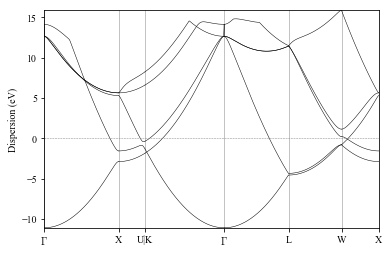

Final crystal symmetry: Fm-3m (number 225)
Extended Bravais lattice symbol: cF2
The system has inversion symmetry: True


In [6]:
fermi_energy = results['scf_parameters'].dict.fermi_energy
results['band_structure'].show_mpl(y_origin=fermi_energy, plot_zero_axis=True)

print """Final crystal symmetry: {spacegroup_international} (number {spacegroup_number})
Extended Bravais lattice symbol: {bravais_lattice_extended}
The system has inversion symmetry: {has_inversion_symmetry}""".format(
    **results['seekpath_parameters'].get_dict())